# Cheme 512- Method of Engineering Analysis

## Analysis of Problem 1.1.2 from Conduction Heat Solution Manual

#### Maria Politi


#### Diagram :

To determine a solution to this problem, a slab composed of two different layers was chosen. A similar procedure to the one displayed below can be use to find the solution for a slab with multiple layers. 


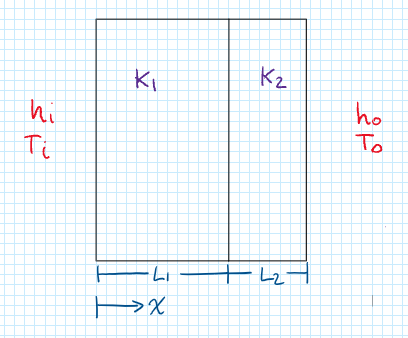


#### The DIfferential Equation:

The energy conservation equation in cartesian coordinates can be found as: 

$$\frac{\partial T}{\partial t} + v_x\frac{\partial T}{\partial x} + v_y\frac{\partial T}{\partial y} + v_z\frac{\partial T}{\partial z} = \alpha \bigg[\frac{\partial^2T}{\partial x^2}+\frac{\partial^2T}{\partial y^2}+\frac{\partial^2T}{\partial z^2}\bigg] + \frac{H_v}{\rho \hat C_p }$$

#### Assumptions:

Given the problem statement provided, the following assumptions can be made to simplify the solution of the ODE:

> * Steady state heat tranfer
> * 1- Dimentional heat transfer
> * No bulk flow- static problem
> * No heat generation

#### The simplified ODE:

Using the assumptions layed out above, the differntial equation can be simplified in the following form:

$$ \frac{d^2T}{dx^2}=0$$

Note: the partial differentials were replaced with full differential as the temperature is only a function of the position aong the x-direction. 

The temperature of each slab section can be then expressed as:

$$ \frac{dT_1}{dx}=a_1 \space \rightarrow \space\space\space\space T_1(x)= a_1x+b_1 $$

$$ \frac{dT_2}{dx}=a_2 \space \rightarrow \space\space\space\space T_2(x)= a_2x+b_2$$

#### Boundary Conditions (BCs) : 

In order to solve the two equations describing the temperature distribution in the slab, four boundary conditions are needed. These ca be found as follows: 

1. Convective heat flux at $(x = 0)$ 

$$h_i[T_1(0)- T_i] = k_1\frac{dT_1}{dx}\space$$

2. Constant heat flux through the slab at $(x=L_1)$

$$ -k_1\frac{dT_1}{dx}\mid_{x=L_1}=-k_2\frac{dT_2}{dx}\mid_{x=L_1}$$

3. Thermal equilibrium at $(x=L_1)$

$$ T_1(L_1)=T_2(L_1) \space $$ 

4. Convective heat flux at $(x = L_1+L_2)$ 

$$h_o[T_2(L_1+L_2) - T_o] = -k\frac{dT_2}{dx}$$


Rewriting them in terms of the constants of integrations at $T_1(x)$ and $T_2(x)$ yields:

1. $h_i[b_1-T_i]=k_1a_1$


2. $-k_1a_1=-k_2a_2$


3. $ a_1L_1+b_1=a_2L_1+b_2$


4. $ h_o[a_2(L_1+L_2)+b_2-T_o]=-k_2a_2$

In [86]:
import sympy as sp
from sympy.solvers import solve
from sympy import Symbol

#Define the symbols for the conductive coefficients
k_1= Symbol('k_1')
k_2= Symbol('k_2')

#Define the symbols for the constants of integration
a_1= Symbol('a_1')
a_2= Symbol('a_2')
b_1= Symbol('b_1')
b_2= Symbol('b_2')

#Define the symbols for the convective coefficients
h_i= Symbol('h_i')
h_o= Symbol('h_o')

#Define the symbols for the temperature distribution in the slabs
T_i= Symbol('T_i')
T_o= Symbol('T_o')

#Define the symbols for the thickness of each slab section
L_1= Symbol('L_1')
L_2= Symbol('L_2')

#Write the symbolic form of the boundary conditions as functions of the constants of integration
eqn1= (k_1*a_1-h_i*(b_1-T_i))
eqn2= (-k_1*a_1+k_2*a_2)
eqn3= (a_1*L_1+b_1-a_2*L_1-b_2)
eqn4= (-k_2*a_2-h_o*(a_2*(L_2+L_1)+b_2-T_o))

#Solve for the constants of integration as function of known variables
sol= sp.nonlinsolve((eqn1,eqn2,eqn3,eqn4),(a_1,a_2,b_1, b_2)).args[0]

print("Constant of integration a1")
display(sol[0])

print("Constant of integration a2")
display(sol[1])

print("Constant of integration b1")
display(sol[2])

print("Constant of integration b2")
display(sol[3])


Constant of integration a1


-h_i*h_o*k_2*(T_i - T_o)/(L_1*h_i*h_o*k_2 + L_2*h_i*h_o*k_1 + h_i*k_1*k_2 + h_o*k_1*k_2)

Constant of integration a2


-h_i*h_o*k_1*(T_i - T_o)/(L_1*h_i*h_o*k_2 + L_2*h_i*h_o*k_1 + h_i*k_1*k_2 + h_o*k_1*k_2)

Constant of integration b1


(L_1*T_i*h_i*h_o*k_2 + L_2*T_i*h_i*h_o*k_1 + T_i*h_i*k_1*k_2 + T_o*h_o*k_1*k_2)/(L_1*h_i*h_o*k_2 + L_2*h_i*h_o*k_1 + h_i*k_1*k_2 + h_o*k_1*k_2)

Constant of integration b2


(L_1*T_i*h_i*h_o*k_1 - L_1*T_o*h_i*h_o*k_1 + L_1*T_o*h_i*h_o*k_2 + L_2*T_i*h_i*h_o*k_1 + T_i*h_i*k_1*k_2 + T_o*h_o*k_1*k_2)/(L_1*h_i*h_o*k_2 + L_2*h_i*h_o*k_1 + h_i*k_1*k_2 + h_o*k_1*k_2)

#### Plot of the solution:

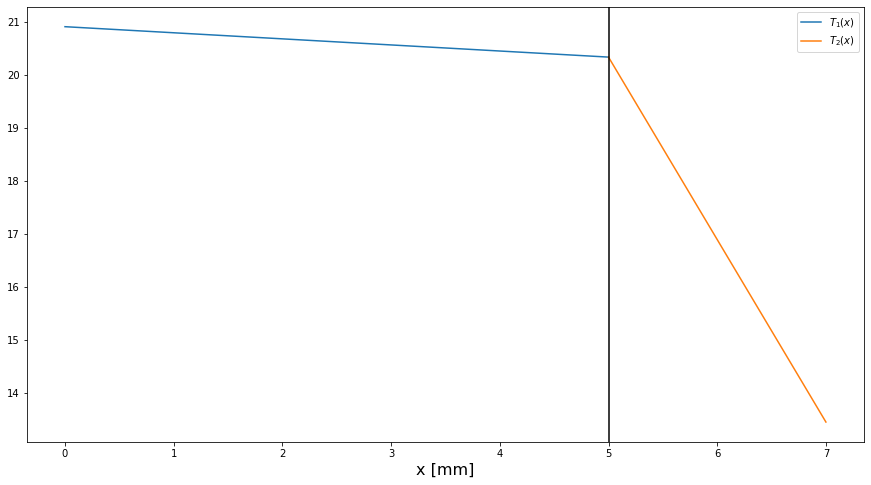

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d

#Choosing values for the convection inside and outside the slab
hi= 20
ho= 0.5

#Defining values for the conductive coefficients of the two materials composing the slab
k1= 15
k2= 0.5

# Innner and outer temperatures. Assuming the inner temperature is higher than the outside one
Ti= 21
To= 10

# Define the thickness of each slab section
L1= 5
L2= 2

x1= np.linspace(0,L1, 100)
x2= np.linspace(L1,L2+L1,100)

# Calcualte the constants of integration based on the solution found by sympy above
a1= -(hi*ho*k2*(Ti-To))/(L1*hi*ho*k2+L2*hi*ho*k1+hi*k1*k2+ho*k2*k1)
a2= -(hi*ho*k1*(Ti-To))/(L1*hi*ho*k2+L2*hi*ho*k1+hi*k1*k2+ho*k2*k1)

b1= (L1*Ti*hi*ho*k2+L2*Ti*hi*ho*k1+Ti*hi*k1*k2+To*ho*k1*k2)/(L1*hi*ho*k2+L2*hi*ho*k1+hi*k1*k2+ho*k2*k1)
b2= (L1*Ti*hi*ho*k1-L1*To*hi*ho*k1+L1*To*hi*ho*k2+L2*Ti*hi*ho*k1+Ti*hi*k2*k1+To*ho*k1*k2)/(L1*hi*ho*k2+L2*hi*ho*k1+hi*k1*k2+ho*k2*k1)

# Calculate the temperature gradient in each slab section. 
T1= a1*x1+b1
T2= a2*x2+b2

# Plot the solution 
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x1,T1, label= '$T_1(x)$')
ax.plot(x2,T2, label= '$T_2(x)$')
plt.legend()
plt.xlabel('x [mm]', fontsize=16)
plt.ylabel('T(x)[$^oC$]', fontsize=16)
plt.axvline(5, c='k')


#### Investigate the effect of the conductive coefficient

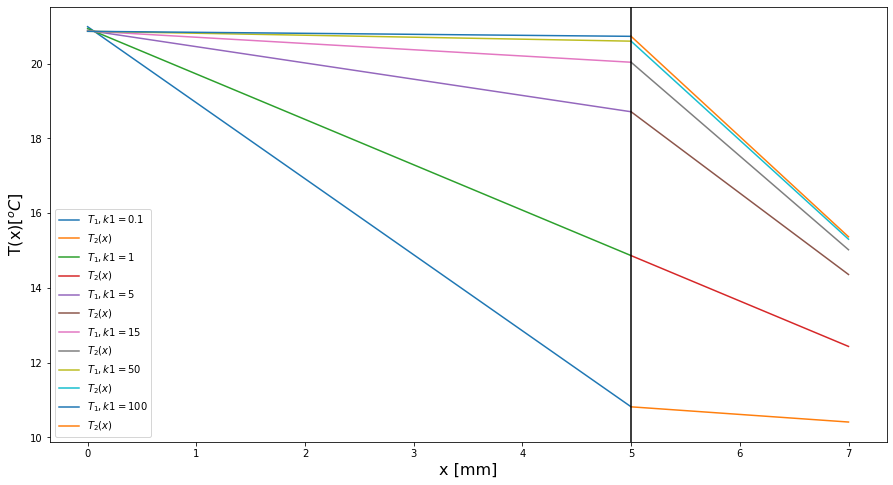

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d

#Repeat the solution and investigate the affect of the conductive coefficien of slab1.

hi= 20
ho= 0.5

k1= [0.1,1,5,15,50,100]
k2= 1

Ti= 21
To= 10

L1= 5
L2= 2

x1= np.linspace(0,L1, 100)
x2= np.linspace(L1,L2+L1,100)

fig, ax = plt.subplots(figsize=(15,8))
for i,k1 in enumerate(k1):
    a1= -(hi*ho*k2*(Ti-To))/(L1*hi*ho*k2+L2*hi*ho*k1+hi*k1*k2+ho*k2*k1)
    a2= -(hi*ho*k1*(Ti-To))/(L1*hi*ho*k2+L2*hi*ho*k1+hi*k1*k2+ho*k2*k1)
    
    b1= (L1*Ti*hi*ho*k2+L2*Ti*hi*ho*k1+Ti*hi*k1*k2+To*ho*k1*k2)/(L1*hi*ho*k2+L2*hi*ho*k1+hi*k1*k2+ho*k2*k1)
    b2= (L1*Ti*hi*ho*k1-L1*To*hi*ho*k1+L1*To*hi*ho*k2+L2*Ti*hi*ho*k1+Ti*hi*k2*k1+To*ho*k1*k2)/(L1*hi*ho*k2+L2*hi*ho*k1+hi*k1*k2+ho*k2*k1)
    
    T1= a1*x1+b1
    T2= a2*x2+b2

    ax.plot(x1,T1, label= '$T_1, k1= {}$'.format(k1))
    ax.plot(x2,T2, label= '$T_2(x)$')

plt.legend()
plt.xlabel('x [mm]', fontsize=16)
plt.ylabel('T(x)[$^oC$]', fontsize=16)
plt.axvline(5, c='k')
